In [1]:
import nltk
import pandas as pd
import re
from matplotlib import pyplot as plt
from wordcloud import WordCloud
import matplotlib.colors as mcolors

In [2]:
with open('Bernie.txt', 'r',encoding="utf8") as fBernie:
    file_data_bs = [line.replace('backslashN', '\n').split('::::') for line in fBernie.readlines()]
field_names_bs = ['retweet_count', 'author_screen_name', 'author_followers_count', 'author_following_count', 'created_at', 'id_str', 'full_text']
data_bernie_sanders = pd.DataFrame(data=file_data_bs, columns=field_names_bs)
data_bernie_sanders.head()

,retweet_count,author_screen_name,author_followers_count,author_following_count,created_at,id_str,full_text
0,0,ghostriderr74,24,85,2019-11-24 00:35:01,1198399587649613824,@BernieSanders Not -- in my town we have medic...
1,0,michaelfrank17,2078,2202,2019-11-24 00:35:01,1198399586403942400,This week I heard @MMFlint say that Nancy Pelo...
2,6,savemain_st,46654,18548,2019-11-24 00:35:00,1198399585049284672,@ninaturner @PortiaABoulger @BernieSanders @jj...
3,0,GeoffWaters5,15,21,2019-11-24 00:35:00,1198399582847340544,@stro1786 @BernieSanders Is that a good thing ...
4,0,FLOURNOYFarrell,3505,4994,2019-11-24 00:34:57,1198399569853325312,@KelticSC @thekaraboudjan @SallyAlbright @Lewi...


In [3]:
with open('Elizabeth.txt', 'r',encoding="utf8") as fElizabeth:
    file_data_ew = [line.replace('backslashN', '\n').split('::::') for line in fElizabeth.readlines()]
field_names_ew = ['retweet_count', 'author_screen_name', 'author_followers_count', 'author_following_count', 'created_at', 'id_str', 'full_text']
data_elizabeth_warren = pd.DataFrame(data=file_data_ew, columns=field_names_ew)
data_elizabeth_warren.head()

,retweet_count,author_screen_name,author_followers_count,author_following_count,created_at,id_str,full_text
0,0,MadonnaMadsen,17987,17467,2019-11-24 16:43:35,1198643333716795392,@no_silenced @ewarren @RepPressley Democrats a...
1,0,natsanpol,322,480,2019-11-24 16:43:28,1198643305493479424,@ewarren @MayaRudolph as @KamalaHarris was als...
2,0,DavidBelfiore1,13,292,2019-11-24 16:43:22,1198643280453484545,@TeamWarren @ewarren Anybody is better than Wa...
3,0,zaxxken,33,47,2019-11-24 16:43:22,1198643278687551488,@CNNPolitics @cnnbrk Goodbye @ewarren @BernieS...
4,0,binsaudigifts,172,269,2019-11-24 16:43:19,1198643267702853639,@ryangrim @ewarren Who on earth are you?\n


In [4]:
with open('Joe.txt', 'r',encoding="utf8") as fJoe:
    file_data_jb = [line.replace('backslashN', '\n').split('::::') for line in fJoe.readlines()]
field_names_jb = ['retweet_count', 'author_screen_name', 'author_followers_count', 'author_following_count', 'created_at', 'id_str', 'full_text']
data_joe_biden = pd.DataFrame(data=file_data_jb, columns=field_names_jb)
data_joe_biden.head()

,retweet_count,author_screen_name,author_followers_count,author_following_count,created_at,id_str,full_text
0,0,rickrowse2,173,255,2019-11-24 20:55:40,1198706776062996480,@JoeBiden Beats going back to the crooked swam...
1,0,FlanAg97,5047,5439,2019-11-24 20:55:40,1198706772086861830,@PeepsPowertothe @JoeBiden @BernieSanders @Sen...
2,0,juniort22163107,186,362,2019-11-24 20:55:37,1198706761064157184,@JoeBiden congrats grandpa enjoy the new grand...
3,0,PostonRuss,1444,2177,2019-11-24 20:55:32,1198706739794894848,@JoeBiden You damn sure can’t!! I can’t wait #...
4,0,are_marines,1316,1746,2019-11-24 20:55:27,1198706717703507968,@JoeBiden and son are corrupt losers https://t...


In [5]:
# import stopwords
stop_words = nltk.corpus.stopwords.words('english')


In [51]:
stop_words.extend(['from', 'subject', 're', 'edu', 'use',"get",'like','want','way','must','yet','take','look','still','hey'])

In [55]:
# clean text and tokenize the tweets
# remove mentions to tweet accounts as they add no information
def clean_text(text):
    text1 = re.sub("[@]","attherate",text)
    names = ["berniesanders","bernie","sanders","elizabethwarren","elizabeth","warren","joebiden","joe","biden",'trump']
    tokenized_text = nltk.tokenize.word_tokenize(text1.lower())
    cleaned_text = [t for t in tokenized_text if t not in stop_words and not 'http' in t and not 'twitter.com' in t and not "attherate" in t and re.match('[a-zA-Z\\-][a-zA-Z\\-]{2,}', t) and t not in names]
    return cleaned_text

In [56]:
def clean_datafiles(data):
    tokenized_data = []
    for text in data:
        tokenized_data.append(clean_text(text))
    return tokenized_data


In [57]:
token_bernie_sanders = clean_datafiles(data_bernie_sanders["full_text"])
token_elizabeth_warren = clean_datafiles(data_elizabeth_warren["full_text"])
token_joe_biden = clean_datafiles(data_joe_biden["full_text"])

In [58]:
tagnames = ['NN','NNS']
tags_bernie_sanders = [nltk.pos_tag(t) for t in token_bernie_sanders]
tags_elizabeth_warren = [nltk.pos_tag(t) for t in token_elizabeth_warren]
tags_joe_biden = [nltk.pos_tag(t) for t in token_joe_biden]

In [59]:
token_bernie_sanders = [[t[0] for t in tag1 if t[1] in tagnames] for tag1 in tags_bernie_sanders]
token_elizabeth_warren = [[t[0] for t in tag1 if t[1] in tagnames] for tag1 in tags_elizabeth_warren]
token_joe_biden = [[t[0] for t in tag1 if t[1] in tagnames] for tag1 in tags_joe_biden]

In [60]:
from nltk.stem.porter import PorterStemmer

# Create p_stemmer of class PorterStemmer
p_stemmer = PorterStemmer()

def stemmed_tokens(tokens):
    token = []
    for token_list in tokens:
        texts = [p_stemmer.stem(i) for i in token_list]
        token.append(texts)
    return token



In [61]:
stemmed_token_bernie_sanders = stemmed_tokens(token_bernie_sanders)
stemmed_token_elizabeth_warren = stemmed_tokens(token_elizabeth_warren)
stemmed_token_joe_biden = stemmed_tokens(token_joe_biden)

In [62]:
import gensim
def ngrams(stemmed_tokens):
# Build the bigram and trigram models
    bigram = gensim.models.Phrases(stemmed_tokens, min_count=5, threshold=100) # higher threshold fewer phrases.
    trigram = gensim.models.Phrases(bigram[stemmed_tokens], threshold=100)  

# Faster way to get a sentence clubbed as a trigram/bigram
    bigram_mod = gensim.models.phrases.Phraser(bigram)
    trigram_mod = gensim.models.phrases.Phraser(trigram)

    final_tokens = []
# See trigram example
    for i in range(0,len(trigram_mod[bigram_mod[stemmed_tokens]])):
        final_tokens.append(trigram_mod[bigram_mod[stemmed_tokens[i]]])
    return final_tokens

In [63]:
final_tokens_bernie_sanders = ngrams(stemmed_token_bernie_sanders)
final_tokens_elizabeth_warren = ngrams(stemmed_token_elizabeth_warren)
final_tokens_joe_biden = ngrams(stemmed_token_joe_biden)

In [64]:
import gensim
from gensim import corpora
dictionary_bernie_sanders = corpora.Dictionary(final_tokens_bernie_sanders)
dictionary_elizabeth_warren = corpora.Dictionary(final_tokens_elizabeth_warren)
dictionary_joe_biden = corpora.Dictionary(final_tokens_joe_biden)

doc_term_matrix_bernie_sanders = [dictionary_bernie_sanders.doc2bow(doc) for doc in final_tokens_bernie_sanders]
doc_term_matrix_elizabeth_warren = [dictionary_elizabeth_warren.doc2bow(doc) for doc in final_tokens_elizabeth_warren]
doc_term_matrix_joe_biden = [dictionary_joe_biden.doc2bow(doc) for doc in final_tokens_joe_biden]


In [65]:

# Creating the object for LDA model using gensim library
Lda = gensim.models.ldamodel.LdaModel

# Running and Trainign LDA model on the document term matrix.
ldamodel_bernie_sanders = Lda(doc_term_matrix_bernie_sanders, num_topics=4, id2word = dictionary_bernie_sanders, passes=50)


In [66]:
print(ldamodel_bernie_sanders.print_topics())

[(0, '0.077*"union" + 0.026*"worker" + 0.019*"peopl" + 0.016*"work" + 0.012*"wage" + 0.012*"compani" + 0.011*"pay" + 0.010*"care" + 0.009*"year" + 0.008*"social"'), (1, '0.021*"peopl" + 0.014*"tax" + 0.013*"money" + 0.013*"time" + 0.011*"candid" + 0.007*"presid" + 0.007*"govern" + 0.007*"mean" + 0.007*"thank" + 0.007*"corpor"'), (2, '0.023*"peopl" + 0.016*"thing" + 0.013*"job" + 0.011*"countri" + 0.009*"plan" + 0.009*"law" + 0.009*"state" + 0.008*"money" + 0.008*"time" + 0.007*"democrat"'), (3, '0.015*"bernie2020" + 0.009*"union" + 0.009*"support" + 0.008*"anyth" + 0.008*"someon" + 0.007*"boycottmsnbc" + 0.006*"guy" + 0.006*"democrat" + 0.006*"see" + 0.006*"labor"')]


In [67]:
ldamodel_elizabeth_warren = Lda(doc_term_matrix_elizabeth_warren, num_topics=3, id2word = dictionary_elizabeth_warren, passes=50)
print(ldamodel_elizabeth_warren.print_topics(num_topics=5, num_words=5))

[(0, '0.014*"candid" + 0.013*"school" + 0.012*"kid" + 0.011*"presid" + 0.011*"amp"'), (1, '0.023*"peopl" + 0.016*"tax" + 0.012*"thing" + 0.010*"money" + 0.009*"billionair"'), (2, '0.021*"school" + 0.013*"time" + 0.011*"peopl" + 0.011*"choic" + 0.008*"power"')]


In [68]:
ldamodel_joe_biden = Lda(doc_term_matrix_joe_biden, num_topics=5, id2word = dictionary_joe_biden, passes=50)
print(ldamodel_joe_biden.print_topics(num_topics=5, num_words=5))

[(0, '0.037*"year" + 0.014*"hunter" + 0.014*"presid" + 0.012*"vote" + 0.012*"peopl"'), (1, '0.012*"watch" + 0.010*"swamp" + 0.009*"countri" + 0.008*"constitut" + 0.008*"everyon"'), (2, '0.019*"nation" + 0.017*"year" + 0.012*"charact" + 0.012*"trump2020" + 0.010*"idiot"'), (3, '0.031*"countri" + 0.026*"peopl" + 0.026*"corrupt" + 0.012*"presid" + 0.011*"maga"'), (4, '0.015*"presid" + 0.012*"weapon" + 0.012*"time" + 0.012*"creepi" + 0.011*"thank"')]


In [69]:
import pyLDAvis
import pyLDAvis.gensim
vis = pyLDAvis.gensim.prepare(topic_model=ldamodel_bernie_sanders, corpus=doc_term_matrix_bernie_sanders, dictionary=dictionary_bernie_sanders)
pyLDAvis.enable_notebook()
pyLDAvis.display(vis)

In [70]:
import pyLDAvis
import pyLDAvis.gensim
vis = pyLDAvis.gensim.prepare(topic_model=ldamodel_elizabeth_warren, corpus=doc_term_matrix_elizabeth_warren, dictionary=dictionary_elizabeth_warren)
pyLDAvis.enable_notebook()
pyLDAvis.display(vis)

In [75]:
import pyLDAvis
import pyLDAvis.gensim
vis = pyLDAvis.gensim.prepare(topic_model=ldamodel_joe_biden, corpus=doc_term_matrix_joe_biden, dictionary=dictionary_joe_biden)
pyLDAvis.enable_notebook()
pyLDAvis.display(vis)

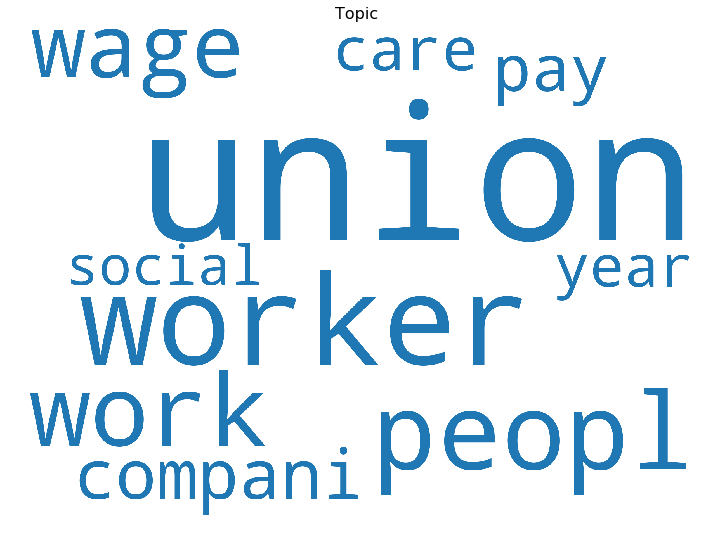

In [71]:
topics = ldamodel_bernie_sanders.show_topics(formatted=False)
    
fig, axes = plt.subplots(1, 1, figsize=(10,10), sharex=True, sharey=True)
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

cloud = WordCloud(stopwords=stop_words,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=10,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[0],
                  prefer_horizontal=1.0)
topic_words = dict(topics[0][1])
cloud.generate_from_frequencies(topic_words)
plt.gca().imshow(cloud)
plt.gca().set_title('Topic', fontdict=dict(size=16))
plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()

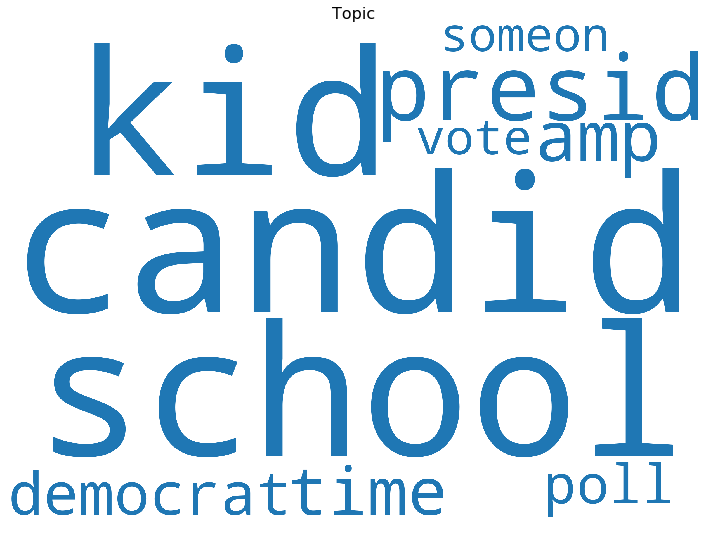

In [72]:
topics = ldamodel_elizabeth_warren.show_topics(formatted=False)
    
fig, axes = plt.subplots(1, 1, figsize=(10,10), sharex=True, sharey=True)
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

cloud = WordCloud(stopwords=stop_words,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=10,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[0],
                  prefer_horizontal=1.0)
topic_words = dict(topics[0][1])
cloud.generate_from_frequencies(topic_words)
plt.gca().imshow(cloud)
plt.gca().set_title('Topic ', fontdict=dict(size=16))
plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()

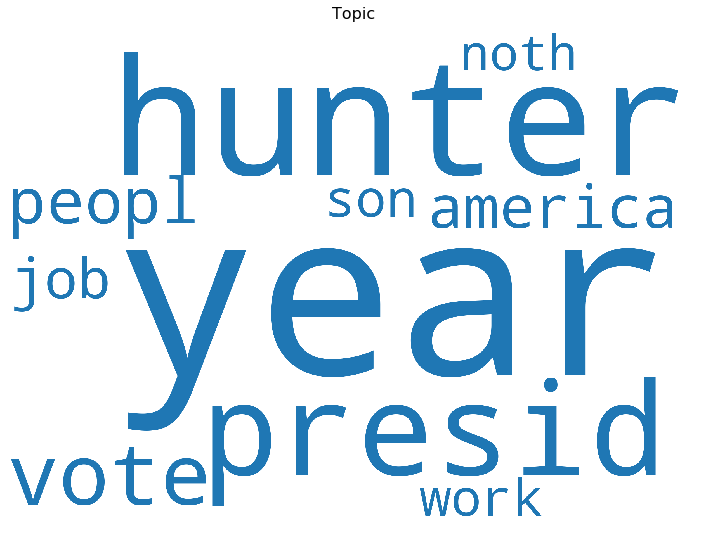

In [73]:
topics = ldamodel_joe_biden.show_topics(formatted=False)
    
fig, axes = plt.subplots(1, 1, figsize=(10,10), sharex=True, sharey=True)
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

cloud = WordCloud(stopwords=stop_words,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=10,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[0],
                  prefer_horizontal=1.0)
topic_words = dict(topics[0][1])
cloud.generate_from_frequencies(topic_words)
plt.gca().imshow(cloud)
plt.gca().set_title('Topic ', fontdict=dict(size=16))
plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()